In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import quantum as qm
import glob
import scipy.linalg as la
import seaborn as sns

In [2]:
colors = ["aqua", "red"]
sns.set_palette(sns.xkcd_palette(colors)+sns.color_palette("Set1", 9))

In [3]:
# Setup #
L = 15
dense = True
h = .2
prefix = 'data/zotoc_vbL' + str(L)
if (h != 1): prefix += 'h'+str(h)
prefix += "#"
sites = np.arange(L)
vs    = np.asarray([.5, .75, .8, .9, 1, 1.1, 1.2, 1.35, 1.5, 2, 2.5, 3])
fnames = glob.glob(prefix + "*.npy")

In [4]:
trials = len(fnames)
otocsfores = np.zeros((trials, len(vs), L))
otocsbacks = np.zeros((trials, len(vs), L))
for idx, fname in enumerate(fnames):
    otocsfores[idx], otocsbacks[idx] = np.load(fname)

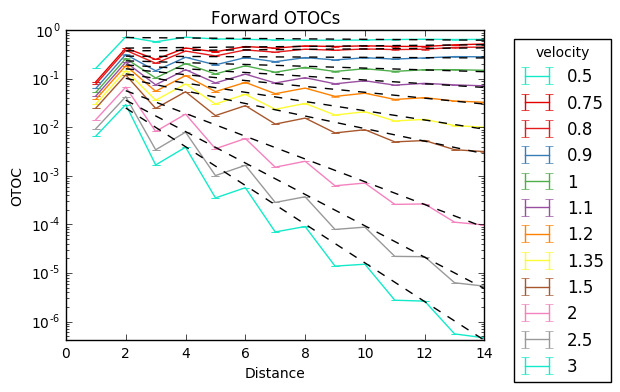

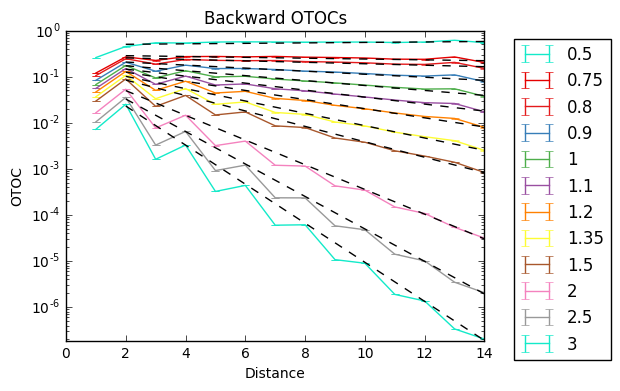

In [7]:
otocsfore, stdsfore = qm.mean_and_std(otocsfores)
otocsback, stdsback = qm.mean_and_std(otocsbacks)
# otocsfore = otocsfores[0]
# otocsback = otocsbacks[0]

# Forward
ax = plt.subplot(111)
gammas_fore = []
errors_fore = []
for idx, otocfore in enumerate(otocsfore):
#     mean, std = qm.mean_and_std(otocfore[::])
    ax.set_yscale("log", nonposy='clip')
#     ax.errorbar(sites[1:], otocfore[1:], label = str(vs[idx]))
    ax.errorbar(sites[1:], otocfore[1:], yerr=stdsfore[idx,1:], label = str(qm.chop(vs[idx])))
    x = sites[2::2]
    y = otocfore[2::2]
    logy = np.log(y)
    coeffs, errors = np.polyfit(x,logy,deg=1, cov=True)
#     print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.plot(x,yfit(x), 'k--')
    gammas_fore.append(coeffs[0] * vs[idx])
    errors_fore.append(np.sqrt(errors[0,0]) * vs[idx])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, title="velocity")
plt.ylim(0,1)
plt.xlabel("Distance")
plt.ylabel("OTOC")
plt.title("Forward OTOCs")
# plt.savefig('figures/zotocs_foreL' + str(L) + '.pdf')
plt.show()

# Backward
ax = plt.subplot(111)
gammas_back = []
errors_back = []
for idx, otocback in enumerate(otocsback):
    ax.set_yscale("log", nonposy='clip')
#     ax.errorbar(sites[1:], otocback[1:], label = str(vs[idx]))
    ax.errorbar(sites[1:], otocback[1:], yerr=stdsback[idx,1:], label = str(qm.chop(vs[idx])))
    x = sites[2::2]
    y = otocback[2::2]
    logy = np.log(y)
    coeffs, errors = np.polyfit(x,logy,deg=1, cov=True)
#     print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.plot(x,yfit(x), 'k--')
    gammas_back.append(coeffs[0] * vs[idx])
    errors_back.append(np.sqrt(errors[0,0]) * vs[idx])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.xlabel("Distance")
plt.ylabel("OTOC")
plt.title("Backward OTOCs")
# plt.savefig('figures/zotocs_backL' + str(L) + '.pdf')
plt.show()

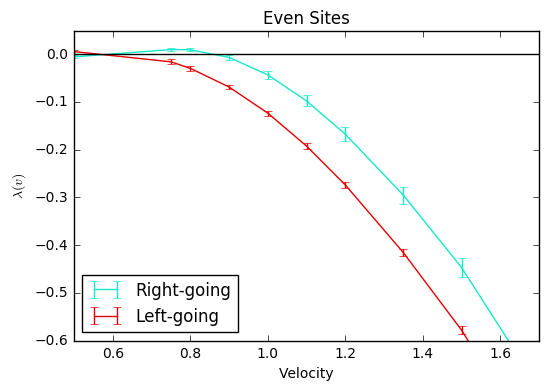

In [11]:
ax = plt.subplot(111)
ax.errorbar(vs, gammas_fore, yerr=errors_fore,  label = "Right-going")
ax.errorbar(vs, gammas_back, yerr=errors_back,  label = "Left-going")
ax.plot(vs, np.zeros(len(vs)), 'k')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
ax.legend(loc=3)
plt.title("Even Sites")
plt.xlabel("Velocity")
plt.xlim((0.5,1.7))
plt.ylim((-.6,.05))
plt.ylabel("$\lambda(v)$")
# plt.savefig('figures/zbutterfly_even_L' + str(L) + '.pdf')
plt.show()

In [9]:
L

15

In [7]:
stop here

SyntaxError: invalid syntax (<ipython-input-7-f9ef205a8f26>, line 1)

Backward:  v_butterfly= 11.4860103479775
Forward:   v_butterfly=10.353668765182652


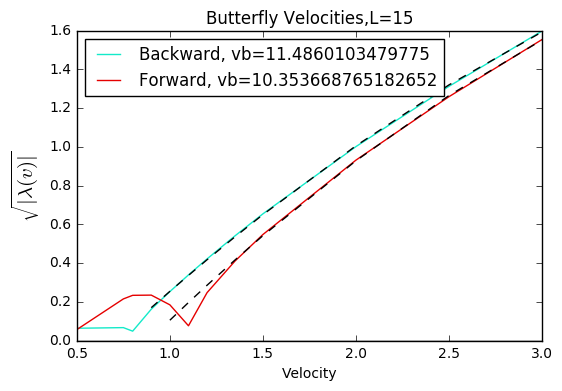

In [13]:
ax = plt.subplot(111)
coeffs = np.polyfit(vs[3:], np.sqrt(np.abs(gammas_back))[3:], deg=2)
fit = np.poly1d(coeffs)
zeros=fit.r[fit.r<50][0]
ax.plot(vs, np.sqrt(np.abs(gammas_back)),  label = "Backward, vb="+str(zeros))
ax.plot(vs[3:], fit(vs[3:]), 'k--')
print("Backward:  v_butterfly= " + str(zeros))
coeffs = np.polyfit(vs[7:], np.sqrt(np.abs(gammas_fore))[7:], deg=2)
fit = np.poly1d(coeffs)
zeros=fit.r[fit.r<50][0]
ax.plot(vs, np.sqrt(np.abs(gammas_fore)),  label = "Forward, vb="+str(zeros))
ax.plot(vs[4:], fit(vs[4:]), 'k--')
print("Forward:   v_butterfly=" + str(zeros))
ax.plot(vs, np.zeros(len(vs)), 'k')
box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width, box.height])
ax.legend(loc=2)
plt.title("Butterfly Velocities,L=" + str(L))
plt.xlabel("Velocity")
plt.ylabel("$\sqrt{|\lambda(v)|}$", fontsize=15)
# plt.ylim(0,5)
# plt.savefig('figures/balanced_butterfly_' + fix + 'L' + str(L) + '.pdf')
plt.show()

In [ ]:
np.shape(otocsfore)

In [ ]:
print(np.average(otocsfore, axis=1))

In [ ]:
forenames

In [ ]:
otocsback

In [ ]:
otocsfore = np.zeros((len(vs), L))
otocsback = np.zeros((len(vs), L))
np.shape(np.stack((otocsfore, otocsback)))

In [8]:
fnames

['data/zotoc_vbL14h0.2#0.npy']